In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('datasets/titanic_csv.csv', index_col=0)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN
1308,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  home.dest  745 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [4]:
data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [6]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
home.dest     object
dtype: object

In [7]:
data = data.infer_objects(copy=False).interpolate()

In [8]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1309 non-null   object 
 11  home.dest  745 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [10]:
data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.706678,0.498854,0.385027,33.276134
std,0.837836,0.486055,13.503863,1.041658,0.865560,51.743613
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,37.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
X = data[['pclass', 'sex', 'age', 'sibsp', 'fare', 'embarked']]
y = data['survived']

In [12]:
X = pd.get_dummies(X)
X.head()

,pclass,age,sibsp,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
1,1,29.0000,0,211.3375,True,False,False,False,True
2,1,0.9167,1,151.5500,False,True,False,False,True
3,1,2.0000,1,151.5500,True,False,False,False,True
4,1,30.0000,1,151.5500,False,True,False,False,True
5,1,25.0000,1,151.5500,True,False,False,False,True


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
model = RandomForestClassifier(n_estimators=100)

In [15]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7989821882951654


In [17]:
print('The Training prediction accuracy is: ', model.score(X_train, y_train))
print('The Testing prediction accuracy is: ', model.score(X_test, y_test))

The Training prediction accuracy is:  0.9879912663755459
The Testing prediction accuracy is:  0.7989821882951654


In [18]:
feature_imp = pd.Series(model.feature_importances_, index=np.array(X.columns)).sort_values(ascending=False)
feature_imp

age           0.314106
fare          0.252687
sex_female    0.135442
sex_male      0.117987
pclass        0.099053
sibsp         0.047107
embarked_C    0.016180
embarked_S    0.011594
embarked_Q    0.005843
dtype: float64

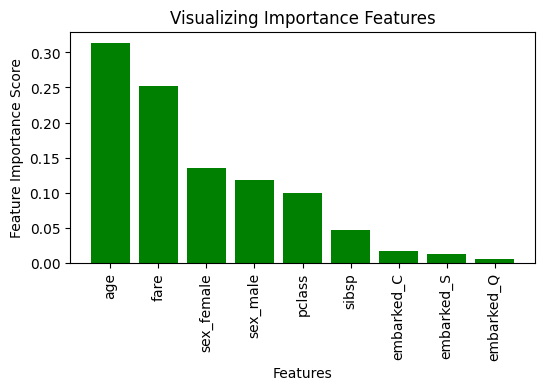

In [19]:
plt.figure(figsize=(6,3))
plt.bar(feature_imp.index, feature_imp, color='g')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Visualizing Importance Features')
plt.xticks(rotation='vertical')
plt.show()

In [20]:
feature_imp[feature_imp >= 0.05].sum()

np.float64(0.9192756464344545)

In [21]:
X_new = X[['age', 'fare', 'sex_female', 'sex_male', 'pclass']]
y_new = data['survived']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3)

In [23]:
model_new = RandomForestClassifier(n_estimators=100)
model_new.fit(X_train, y_train)
y_pred=model_new.predict(X_test)

In [24]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7862595419847328


In [25]:
print('The Training prediction accuracy is: ', model_new.score(X_train, y_train))
print('The Testing prediction accuracy is: ', model_new.score(X_test, y_test))

The Training prediction accuracy is:  0.9858078602620087
The Testing prediction accuracy is:  0.7862595419847328


In [26]:
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[217,  33],
       [ 51,  92]])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       250
           1       0.74      0.64      0.69       143

    accuracy                           0.79       393
   macro avg       0.77      0.76      0.76       393
weighted avg       0.78      0.79      0.78       393



In [28]:
y_prob = model_new.predict_proba(X_test)
y_probs = y_prob[:,1]

In [29]:
roc_auc_score(y_test, y_probs)

0.8148671328671329

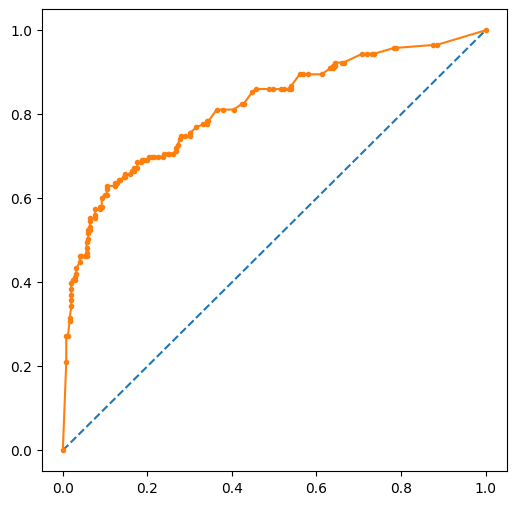

In [30]:
plt.figure(figsize=(6,6))
fpr, tpr, threshold = roc_curve(y_test, y_probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Comments:
+ R^2 improved when we removed some important features in the model
+ ROC AUC score = 0.84